In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [2]:
df = pd.read_json('newsgroups.json')
df

,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space
...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,sci.med
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4,comp.sys.mac.hardware
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3,comp.sys.ibm.pc.hardware
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,comp.graphics


In [3]:
df['content'][0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [4]:
data = df.content.values.tolist()
data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [5]:
import re
data = [re.sub('\S*@\S*\s' ,'' ,x) for x in data]
data[0]

"From: (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [6]:
data = [re.sub('\s+' ,' ' ,x) for x in data]
data[0]

"From: (where's my thing) Subject: WHAT car is this!? Nntp-Posting-Host: rac3.wam.umd.edu Organization: University of Maryland, College Park Lines: 15 I was wondering if anyone out there could enlighten me on this car I saw the other day. It was a 2-door sports car, looked to be from the late 60s/ early 70s. It was called a Bricklin. The doors were really small. In addition, the front bumper was separate from the rest of the body. This is all I know. If anyone can tellme a model name, engine specs, years of production, where this car is made, history, or whatever info you have on this funky looking car, please e-mail. Thanks, - IL ---- brought to you by your neighborhood Lerxst ---- "

In [7]:
data = pd.Series(data)

In [8]:
data_preprocessed = data.apply(lambda x : re.sub(r'[^a-zA-Z/s]+' ,' ' ,x).lower())
data_preprocessed[0]

'from where s my thing subject what car is this nntp posting host rac wam umd edu organization university of maryland college park lines i was wondering if anyone out there could enlighten me on this car i saw the other day it was a door sports car looked to be from the late s/ early s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyone can tellme a model name engine specs years of production where this car is made history or whatever info you have on this funky looking car please e mail thanks il brought to you by your neighborhood lerxst '

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/adarsh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/adarsh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use'])
len(stop_words)

184

In [11]:
from nltk import word_tokenize
final_data = data_preprocessed.apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words and len(x)>2]))
final_data[0]

'thing car nntp posting host rac wam umd organization university maryland college park lines wondering anyone could enlighten car saw day door sports car looked late s/ early called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please e mail thanks il brought neighborhood lerxst'

In [12]:
word_list = []
for sentence in final_data:
    word_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(word_list)
freq_dist.most_common(20)

[('ax', 58871),
 ('/', 15417),
 ('lines', 11832),
 ('organization', 11208),
 ('x', 10929),
 ('one', 9014),
 ('would', 8906),
 ('writes', 7840),
 ('article', 7434),
 ('w', 6700),
 ('q', 6636),
 ('g', 6221),
 ('r', 6101),
 ('people', 5976),
 ('like', 5855),
 ('f', 5800),
 ('university', 5583),
 ('posting', 5506),
 ('p', 5506),
 ('b', 5474)]

In [13]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [14]:
word_sent = [x.split() for x in final_data]
word_sent

[['thing',
  'car',
  'nntp',
  'posting',
  'host',
  'rac',
  'wam',
  'umd',
  'organization',
  'university',
  'maryland',
  'college',
  'park',
  'lines',
  'wondering',
  'anyone',
  'could',
  'enlighten',
  'car',
  'saw',
  'day',
  'door',
  'sports',
  'car',
  'looked',
  'late',
  's/',
  'early',
  'called',
  'bricklin',
  'doors',
  'really',
  'small',
  'addition',
  'front',
  'bumper',
  'separate',
  'rest',
  'body',
  'know',
  'anyone',
  'tellme',
  'model',
  'name',
  'engine',
  'specs',
  'years',
  'production',
  'car',
  'made',
  'history',
  'whatever',
  'info',
  'funky',
  'looking',
  'car',
  'please',
  'e',
  'mail',
  'thanks',
  'il',
  'brought',
  'neighborhood',
  'lerxst'],
 ['guy',
  'kuo',
  'si',
  'clock',
  'poll',
  'final',
  'call',
  'summary',
  'final',
  'call',
  'si',
  'clock',
  'reports',
  'keywords',
  'si',
  'acceleration',
  'clock',
  'upgrade',
  'article',
  'shelley',
  'qvfo',
  'innc',
  'organization',
  'uni

In [15]:
bigram = Phrases(word_sent ,min_count=5 ,threshold=100)
trigram = Phrases(bigram[word_sent],threshold=100)

bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

bow = [trigram_phraser[bigram_phraser[words]] for words in word_sent]

In [16]:
bow[0:1]

[['thing',
  'car',
  'nntp_posting_host',
  'rac_wam_umd',
  'organization',
  'university',
  'maryland_college_park',
  'lines',
  'wondering',
  'anyone',
  'could',
  'enlighten',
  'car',
  'saw',
  'day',
  'door',
  'sports',
  'car',
  'looked',
  'late',
  's/',
  'early',
  'called',
  'bricklin',
  'doors',
  'really',
  'small',
  'addition',
  'front_bumper',
  'separate',
  'rest',
  'body',
  'know',
  'anyone',
  'tellme',
  'model',
  'name',
  'engine',
  'specs',
  'years',
  'production',
  'car',
  'made',
  'history',
  'whatever',
  'info',
  'funky',
  'looking',
  'car',
  'please',
  'e_mail',
  'thanks',
  'il',
  'brought',
  'neighborhood',
  'lerxst']]

In [17]:
!python3 -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 972.0 kB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [18]:
#Lemmitisation using spacy and POS tagging
import spacy
nlp = spacy.load('en_core_web_sm' ,disable=['parser','ner'])


In [19]:
doc = nlp(' '.join(bow[0]))
for token in doc:
    print(f"{token} >> {token.pos_}")

thing >> NOUN
car >> NOUN
nntp_posting_host >> NUM
rac_wam_umd >> NOUN
organization >> NOUN
university >> NOUN
maryland_college_park >> PROPN
lines >> NOUN
wondering >> VERB
anyone >> PRON
could >> AUX
enlighten >> VERB
car >> NOUN
saw >> VERB
day >> NOUN
door >> NOUN
sports >> NOUN
car >> NOUN
looked >> VERB
late >> ADJ
s/ >> PROPN
early >> ADV
called >> VERB
bricklin >> PROPN
doors >> NOUN
really >> ADV
small >> ADJ
addition >> NOUN
front_bumper >> NUM
separate >> ADJ
rest >> NOUN
body >> NOUN
know >> VERB
anyone >> PRON
tellme >> ADP
model >> NOUN
name >> NOUN
engine >> NOUN
specs >> NOUN
years >> NOUN
production >> NOUN
car >> NOUN
made >> VERB
history >> NOUN
whatever >> DET
info >> NOUN
funky >> ADJ
looking >> VERB
car >> NOUN
please >> INTJ
e_mail >> NOUN
thanks >> NOUN
il >> PROPN
brought >> VERB
neighborhood >> NOUN
lerxst >> NOUN


In [20]:
def lemmatization(texts ,tags=['NOUN','ADJ','VERB','ADV','PROPN']):
    texts_out = []
    for sent in texts:
        docs = nlp(' '.join(sent))
        texts_out.append([token.lemma_ for token in docs if token.pos_ in tags])
    return texts_out

In [21]:
bag_of_words = lemmatization(bow)

In [24]:
len(bag_of_words[0])

48

In [25]:
len(bow[0])

56

In [26]:
from gensim import corpora
id2word = corpora.Dictionary(bag_of_words)
print(id2word)

Dictionary<77102 unique tokens: ['addition', 'body', 'bricklin', 'bring', 'call']...>


In [27]:
corpus_matrix = [id2word.doc2bow(sent) for sent in bag_of_words]

In [30]:
corpus_matrix[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 5),
 (6, 1),
 (7, 2),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 2),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1)]

In [31]:
import gensim 
LDA = gensim.models.ldamodel.LdaModel

lda_model = LDA(corpus=corpus_matrix ,id2word=id2word ,
                num_topics=20 ,
                random_state=100 ,
                update_every=1 ,
                chunksize=100 ,
                passes=5 ,
                alpha='auto' ,
                per_word_topics=True)

In [32]:
lda_model.print_topics()

[(0,
  '0.029*"child" + 0.028*"people" + 0.023*"law" + 0.020*"government" + 0.016*"church" + 0.015*"kill" + 0.014*"death" + 0.011*"greek" + 0.011*"society" + 0.011*"woman"'),
 (1,
  '0.069*"team" + 0.064*"game" + 0.049*"win" + 0.037*"play" + 0.024*"year" + 0.021*"season" + 0.020*"fan" + 0.017*"brain" + 0.015*"division" + 0.014*"score"'),
 (2,
  '0.124*"drive" + 0.071*"mac" + 0.030*"scsi" + 0.028*"apple" + 0.024*"controller" + 0.024*"chip" + 0.021*"algorithm" + 0.021*"rsa" + 0.020*"clearly" + 0.017*"ide"'),
 (3,
  '0.058*"cd" + 0.042*"iran" + 0.041*"criminal" + 0.031*"homosexual" + 0.028*"islam" + 0.027*"muslim" + 0.023*"islamic" + 0.022*"relation" + 0.016*"investigate" + 0.014*"secular"'),
 (4,
  '0.028*"line" + 0.028*"organization" + 0.018*"system" + 0.016*"use" + 0.013*"university" + 0.012*"need" + 0.011*"program" + 0.010*"file" + 0.010*"host" + 0.010*"thank"'),
 (5,
  '0.073*"player" + 0.039*"serious" + 0.030*"route" + 0.029*"wing" + 0.027*"trust" + 0.025*"father" + 0.025*"baseball"

In [33]:
import pickle
with open('lda_model.pickle','wb') as file:
    pickle.dump(lda_model ,file)

In [36]:
!pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 263.3 kB/s eta 0:00:00 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 352.5 kB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.2/375.2 kB 676.3 kB/s eta 0:00:00 kB/s eta 0:00:01:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.3.1 requires opencv-python-headless>=4.1.1, which is not installed.
qudida 0.0.4 requires opencv-python-headless>=4.0.1, which is not installed.
supervision 0.17.1 requires opencv-pyth

In [37]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14     0.388549  0.138249       1        1  40.605219
4      0.329369  0.017348       2        1  16.680053
8      0.307695  0.059570       3        1  13.267078
18     0.141512 -0.389370       4        1   6.055937
19     0.027798 -0.283011       5        1   5.478705
0      0.121460  0.104955       6        1   3.967870
1      0.033656  0.022042       7        1   2.318749
17     0.119779  0.087701       8        1   2.115872
15    -0.025890 -0.009976       9        1   1.847331
16    -0.058787  0.001148      10        1   1.728165
2     -0.079056 -0.000163      11        1   1.109822
12    -0.067671  0.006319      12        1   0.885896
9     -0.126503  0.020517      13        1   0.883094
5     -0.131740  0.021304      14        1   0.789780
7     -0.121887  0.038219      15        1   0.708523
10    -0.160982  0.028363      16        1   0.488070
13    -0.162510  0.028953      17        1   0.430245
3     -0.171145  0.035623      18        1   0.264454
11    -0.178819  0.035211      19        1   0.226391
6     -0.184826  0.036997      20        1   0.148748, topic_info=           Term          Freq         Total Category  logprob  loglift
5815         ax  47264.000000  47264.000000  Default  30.0000  30.0000
1574          q  12444.000000  12444.000000  Default  29.0000  29.0000
590           r  10562.000000  10562.000000  Default  28.0000  28.0000
750           g  10055.000000  10055.000000  Default  27.0000  27.0000
215           p   9990.000000   9990.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
31971  eckhardt      0.022999      1.240666  Topic20 -11.5449   2.5227
5964        hst      0.022999      1.240672  Topic20 -11.5449   2.5227
22424    vandal      0.022999      1.240666  Topic20 -11.5449   2.5227
6962      cache      0.022999      1.240695  Topic20 -11.5449   2.5227
5182      shift      0.022999      1.240693  Topic20 -11.5449   2.5227

[873 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1093      4  0.992315           ab
1682      3  0.999409       accept
93        2  0.999114       access
1775     17  0.988358      acquire
1881      1  0.457421          act
...     ...       ...          ...
41        3  0.178385         year
41        7  0.193663         year
4188     18  0.885583  yet_rushdie
967      16  0.973643           yo
2757     14  0.995566         zone

[1150 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 5, 9, 19, 20, 1, 2, 18, 16, 17, 3, 13, 10, 6, 8, 11, 14, 4, 12, 7])

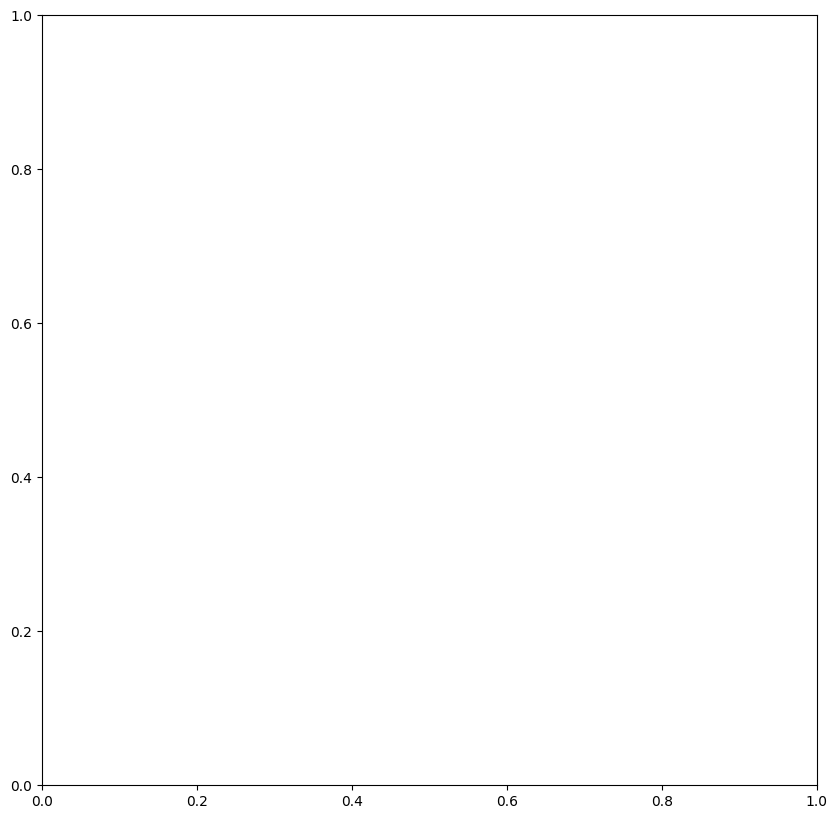

In [38]:
fig ,ax = plt.subplots(figsize=(10,10))
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model ,corpus=corpus_matrix ,dictionary=id2word)
vis

In [39]:
print('Perplexity : ' ,lda_model.log_perplexity(corpus_matrix))

from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model ,texts=bag_of_words ,dictionary=id2word ,coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence : ',coherence_lda)

Perplexity :  -14.781955588018

Coherence :  0.549966956934581


In [41]:
def compute_coherence_values(dictionary ,corpus ,texts ,limit ,start=2 ,step=3):

    coherence_values = []
    model_list = []

    for num_topics in range(start ,limit ,step):
        model = LDA(corpus=corpus ,num_topics=num_topics ,id2word=id2word)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model ,texts=texts ,dictionary=dictionary ,coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list ,coherence_values

In [42]:
model_list ,coherence_values = compute_coherence_values(dictionary=id2word ,corpus=corpus_matrix ,texts=bag_of_words ,limit=40 ,start=18 ,step=6)

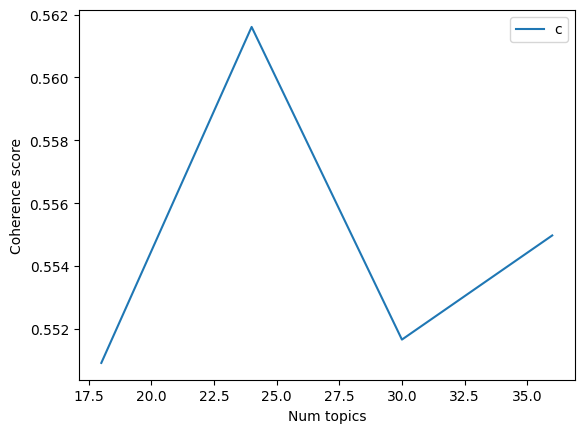

In [43]:
start=18
limit=40
step=6
x = range(start ,limit ,step)
plt.plot(x ,coherence_values)
plt.xlabel('Num topics')
plt.ylabel('Coherence score')
plt.legend(('coherence values') ,loc='best')
plt.show()